# Notebook 2: Statistical Modeling - Peer Tutoring Effectiveness Analysis
## Calbright Data Analysis Program (2025 Q1)

## Description
This notebook performs statistical modeling to evaluate the effect of peer tutoring on student competency completion in the Calbright Data Analysis Program. 
- **Input:** Cleaned gradebook and tutoring data from Notebook 1
- **Analysis:** Exploratory data analysis, statistical testing, and Zero-Inflated Negative Binomial (ZINB) modeling
- **Output:** Statistical evidence of tutoring effectiveness with actionable insights

---
## 1 Exploratory Data Analysis

### 1.1 Setup and Imports
#### Required Libraries

In [4]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# for statsmodel
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP
from statsmodels.discrete.discrete_model import NegativeBinomial
from statsmodels.tools.tools import add_constant

# for scipy and sklearn
from scipy import stats
from scipy.stats import mannwhitneyu

### 1.2 Load Cleaned Data
#### Loading preprocessed datasets from Notebook 1

In [6]:
# the Cleaned CSV data file is the "data_wrangling_ouput" directory
gb_data_500_501_2025Q1 = pd.read_csv("../data_wrangling_ouput/BUS500-501_2025Q1.csv")
gb_data_500_501_2025Q1_Tutor = pd.read_csv(
    "../data_wrangling_ouput/BUS500-501_2025Q1_Tutor.csv"
)
gb_data_500_501_2025Q1_noTutor = pd.read_csv(
    "../data_wrangling_ouput/BUS500-501_2025Q1_noTutor.csv"
)

In [7]:
# check the size of dataset
gb_data_500_501_2025Q1.shape, gb_data_500_501_2025Q1_Tutor.shape, gb_data_500_501_2025Q1_noTutor.shape

((2558, 3), (137, 3), (2421, 3))

In [8]:
# Call the info method on the data to see a summary of the data
gb_data_500_501_2025Q1.info()
gb_data_500_501_2025Q1_Tutor.info()
gb_data_500_501_2025Q1_noTutor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Learner Identifier         2558 non-null   object
 1   Completion Count Progress  2558 non-null   int64 
 2   % Completion Progress      2558 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 60.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Learner Identifier         137 non-null    object
 1   Completion Count Progress  137 non-null    int64 
 2   % Completion Progress      137 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 3 columns):
 #   Column                     N

In [ ]:
# Call the head method on the data to print the first several rows of the data
gb_data_500_501_2025Q1.head()

In [ ]:
# Call the head method on the data to print the first several rows of the data
gb_data_500_501_2025Q1_Tutor.head()

In [ ]:
# Call the head method on the data to print the first several rows of the data
gb_data_500_501_2025Q1_noTutor.head()

### 1.3 Exploratory Data Analysis

#### 1.3.1 Descriptive Statistics

In [14]:
# Call the describe method to output descriptive statistics of the data
gb_data_500_501_2025Q1.describe()

,Completion Count Progress,% Completion Progress
count,2558.000000,2558.000000
mean,0.612197,5.080532
std,1.543440,12.860057
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,8.000000
max,12.000000,100.000000


In [15]:
# Call the describe method to output descriptive statistics of the data
gb_data_500_501_2025Q1_Tutor.describe()

,Completion Count Progress,% Completion Progress
count,137.000000,137.000000
mean,2.021898,16.795620
std,2.441875,20.356434
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,8.000000
75%,3.000000,25.000000
max,12.000000,100.000000


In [16]:
# Call the describe method to output descriptive statistics of the data
gb_data_500_501_2025Q1_noTutor.describe()

,Completion Count Progress,% Completion Progress
count,2421.000000,2421.000000
mean,0.532425,4.417596
std,1.436350,11.968568
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,12.000000,100.000000


In [17]:
print(gb_data_500_501_2025Q1.describe())
print(gb_data_500_501_2025Q1_Tutor.describe())
print(gb_data_500_501_2025Q1_noTutor.describe())

       Completion Count Progress  % Completion Progress
count                2558.000000            2558.000000
mean                    0.612197               5.080532
std                     1.543440              12.860057
min                     0.000000               0.000000
25%                     0.000000               0.000000
50%                     0.000000               0.000000
75%                     1.000000               8.000000
max                    12.000000             100.000000
       Completion Count Progress  % Completion Progress
count                 137.000000             137.000000
mean                    2.021898              16.795620
std                     2.441875              20.356434
min                     0.000000               0.000000
25%                     0.000000               0.000000
50%                     1.000000               8.000000
75%                     3.000000              25.000000
max                    12.000000             100

In [18]:
# Create comprehensive summary
# Run .describe() for each dataset
all_stats = gb_data_500_501_2025Q1.describe().T
tutored_stats = gb_data_500_501_2025Q1_Tutor.describe().T
notutored_stats = gb_data_500_501_2025Q1_noTutor.describe().T

# Add a Group column so we know which summary belongs to which dataset
all_stats["Group"] = "All Students"
tutored_stats["Group"] = "Tutored"
notutored_stats["Group"] = "Untutored"

# Combine into one dataframe
combined_stats = pd.concat([all_stats, tutored_stats, notutored_stats])

# Reset index so variables are in a column instead of index
combined_stats = combined_stats.reset_index().rename(columns={"index": "Variable"})

# Reorder columns: Group, Variable, then stats
cols = ["Group", "Variable"] + [
    c for c in combined_stats.columns if c not in ["Group", "Variable"]
]
combined_stats = combined_stats[cols]

print(combined_stats)

          Group                   Variable   count       mean        std  min  \
0  All Students  Completion Count Progress  2558.0   0.612197   1.543440  0.0   
1  All Students      % Completion Progress  2558.0   5.080532  12.860057  0.0   
2       Tutored  Completion Count Progress   137.0   2.021898   2.441875  0.0   
3       Tutored      % Completion Progress   137.0  16.795620  20.356434  0.0   
4     Untutored  Completion Count Progress  2421.0   0.532425   1.436350  0.0   
5     Untutored      % Completion Progress  2421.0   4.417596  11.968568  0.0   

   25%  50%   75%    max  
0  0.0  0.0   1.0   12.0  
1  0.0  0.0   8.0  100.0  
2  0.0  1.0   3.0   12.0  
3  0.0  8.0  25.0  100.0  
4  0.0  0.0   0.0   12.0  
5  0.0  0.0   0.0  100.0  


#### Key Observations:
- **Tutored students:** Mean completion = 2.02 competencies (median = 1)
- **Untutored students:** Mean completion = 0.53 competencies (median = 0)
- **Initial finding:** Tutored students show ~4x higher mean completion rate

---
## 2 Statistical Modeling and Inference

### 2.1 Wilcoxon Rank-Sum Test (Mann–Whitney U Test)

#### Statistical significance testing for non-parametric data
Given the highly skewed distribution and excess zeros, we use the Wilcoxon Rank-Sum test.

In [23]:
# Replace with actual column access
tutored = gb_data_500_501_2025Q1_Tutor["Completion Count Progress"]
untutored = gb_data_500_501_2025Q1_noTutor["Completion Count Progress"]

# Perform the two-sided Mann–Whitney U Test (default is one-sided)
stat, p_value = mannwhitneyu(tutored, untutored, alternative="two-sided")

# Create a DataFrame to hold the results
wilcoxon_results = pd.DataFrame(
    {"Test": ["Mann-Whitney U"], "Statistic": [stat], "p_value": [p_value]}
)

print(f"Wilcoxon Rank-Sum (Mann–Whitney U) Test")
print(f"Statistic: {stat}")
print(f"P-value: {p_value}")

Wilcoxon Rank-Sum (Mann–Whitney U) Test
Statistic: 244099.5
P-value: 8.190711159532278e-34


#### Interpretation:
- The extremely small p-value (< 0.00001) indicates a statistically significant difference between the tutored and untutored groups.

### 2.2 Data Distribution Analysis

#### 2.2.1 Empirical Cumulative Distribution Function (ECDF) Analysis

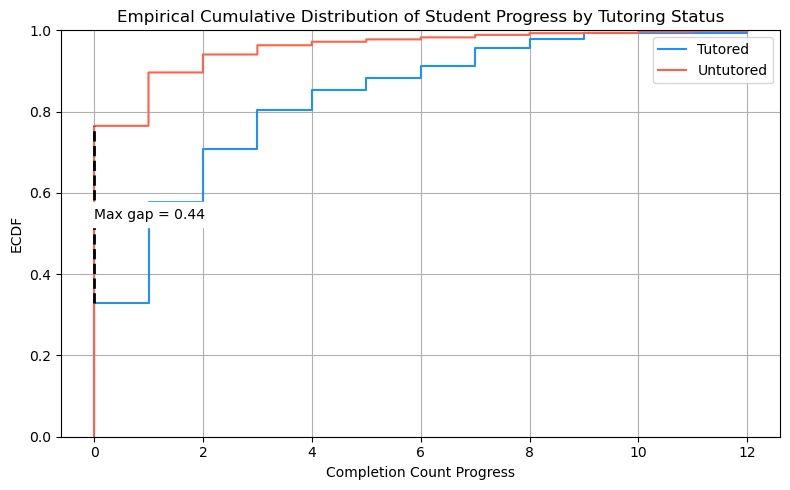

In [27]:
# from statsmodels.distributions.empirical_distribution import ECDF

# Prepare the data
tutored = gb_data_500_501_2025Q1_Tutor["Completion Count Progress"]
untutored = gb_data_500_501_2025Q1_noTutor["Completion Count Progress"]

# Compute ECDFs
ecdf_tutored = ECDF(tutored)
ecdf_untutored = ECDF(untutored)

# Create a common set of x values for comparison
x_vals = np.linspace(
    min(tutored.min(), untutored.min()), max(tutored.max(), untutored.max()), 1000
)

# Compute the ECDF values at those x values
tutored_vals = ecdf_tutored(x_vals)
untutored_vals = ecdf_untutored(x_vals)

# Compute vertical differences
diffs = np.abs(tutored_vals - untutored_vals)
max_diff_idx = np.argmax(diffs)
max_diff_x = x_vals[max_diff_idx]
max_diff_y1 = tutored_vals[max_diff_idx]
max_diff_y2 = untutored_vals[max_diff_idx]

# Plot ECDFs
plt.figure(figsize=(8, 5))
sns.ecdfplot(data=tutored, label="Tutored", color="dodgerblue")
sns.ecdfplot(data=untutored, label="Untutored", color="tomato")

# Annotate maximum gap
plt.plot([max_diff_x, max_diff_x], [max_diff_y1, max_diff_y2], "k--", lw=2)
plt.text(
    max_diff_x,
    (max_diff_y1 + max_diff_y2) / 2,
    f"Max gap = {diffs[max_diff_idx]:.2f}",
    ha="left",
    va="center",
    fontsize=10,
    color="black",
    backgroundcolor="white",
)

# Formatting
plt.xlabel("Completion Count Progress")
plt.ylabel("ECDF")
plt.title("Empirical Cumulative Distribution of Student Progress by Tutoring Status")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../data_modeling_output/ecdf_2025Q1.png", dpi=300, bbox_inches="tight")
plt.show()

In [28]:
# report the x-value and ECDF percentages at which this maximum difference occurs
print(f"Max ECDF gap: {diffs[max_diff_idx]:.4f} at x = {max_diff_x:.2f}")
print(f"Tutored ECDF at x: {max_diff_y1:.4f}")
print(f"Untutored ECDF at x: {max_diff_y2:.4f}")

Max ECDF gap: 0.4365 at x = 0.00
Tutored ECDF at x: 0.3285
Untutored ECDF at x: 0.7650


#### Interpretation:
- Maximum gap of 43.65% occurs at zero completions
- 76.5% of untutored vs 32.9% of tutored students had zero completions
- This substantial difference indicates tutoring's effectiveness in preventing complete disengagement

#### 2.2.2 Box Plot and Violin Plot

In [31]:
# Combine the data into a single DataFrame
combined_df = pd.concat(
    [
        gb_data_500_501_2025Q1_Tutor[["Completion Count Progress"]].assign(
            Group="Tutored"
        ),
        gb_data_500_501_2025Q1_noTutor[["Completion Count Progress"]].assign(
            Group="Untutored"
        ),
    ]
)

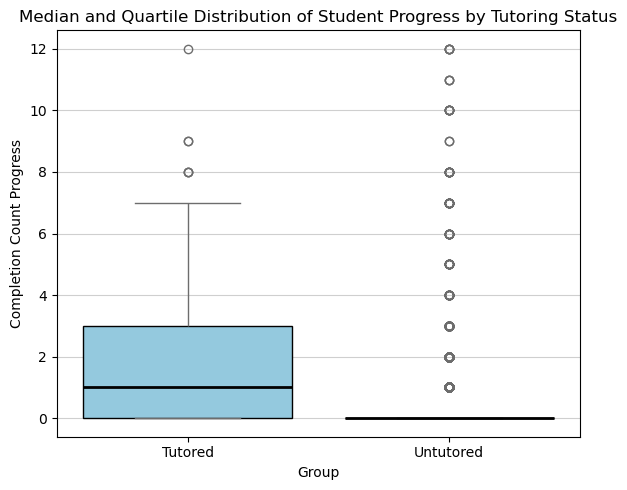

In [32]:
# Define color palette
palette = {"Tutored": "skyblue", "Untutored": "salmon"}

# Plot boxplot (assign hue to match palette mapping)
plt.figure(figsize=(6, 5))
sns.boxplot(
    x="Group",
    y="Completion Count Progress",
    data=combined_df,
    hue="Group",  # explicitly use hue to apply palette
    dodge=False,  # ensures no duplication of boxes
    palette=palette,
    boxprops=dict(edgecolor="black"),
    medianprops=dict(color="black", linewidth=2),  # neutral dark line
)

plt.title("Median and Quartile Distribution of Student Progress by Tutoring Status")
plt.grid(True, axis="y", alpha=0.6)
plt.tight_layout()
plt.savefig("../data_modeling_output/boxplot_2025Q1.png", dpi=300, bbox_inches="tight")
plt.show()

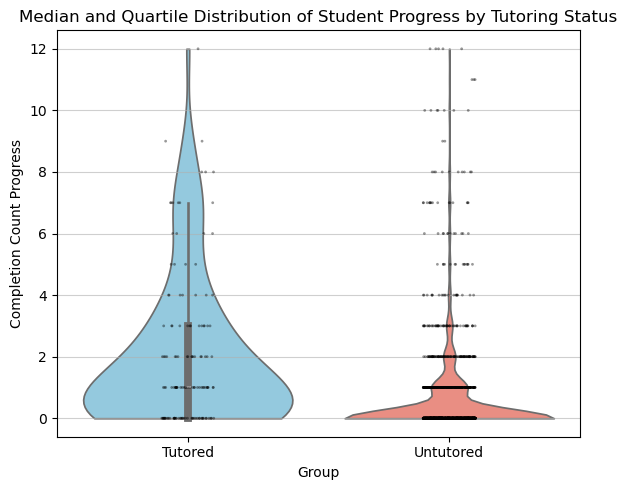

In [33]:
# Define color palette
palette = {"Tutored": "skyblue", "Untutored": "salmon"}

# Plot violin + stripplot
plt.figure(figsize=(6, 5))

sns.violinplot(
    x="Group",
    y="Completion Count Progress",
    data=combined_df,
    hue="Group",  # explicitly use hue for palette
    dodge=False,  # avoid duplicated violins
    palette=palette,
    inner="box",
    cut=0,
)

sns.stripplot(
    x="Group",
    y="Completion Count Progress",
    data=combined_df,
    hue="Group",  # explicitly use hue for palette
    dodge=False,  # overlay points on same violin
    palette={"Tutored": "black", "Untutored": "black"},
    size=2,
    jitter=True,
    alpha=0.4,
    legend=False,  # avoid duplicate legends
)

plt.title("Median and Quartile Distribution of Student Progress by Tutoring Status")
plt.grid(True, axis="y", alpha=0.6)
plt.tight_layout()
plt.savefig("../data_modeling_output/violin_2025Q1.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation:
- Tutored group median = 1 vs Untutored median = 0
- Greater variability in tutored group indicates heterogeneous response to intervention
- Both groups contain high-performing outliers

#### 2.2.3 Histogram: Tutored vs. Untutored Overlay

**Density Histogram**: represents the relative frequency or proportion of data points within each bin (should present this normalized values). 

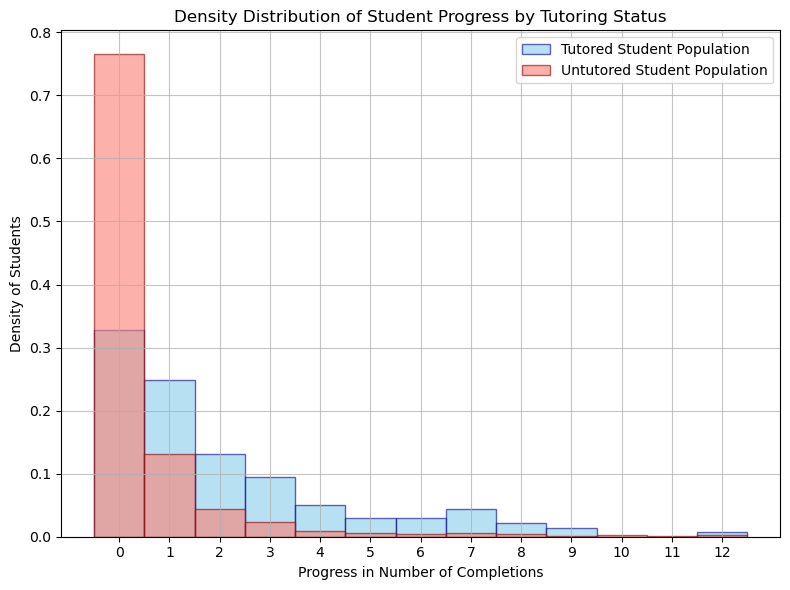

In [37]:
# Set up bins once
# Bins to center on 0-12, suitable for integer counts
bins = np.arange(0, 14) - 0.5

# Prepare data
df_tutored = gb_data_500_501_2025Q1_Tutor.copy()
df_untutored = gb_data_500_501_2025Q1_noTutor.copy()

# Create a single plot for combined histograms
plt.figure(figsize=(8, 6))

# Plot histogram for Tutored population
plt.hist(
    df_tutored["Completion Count Progress"],
    bins=bins,
    alpha=0.6,  # Transparency for overlap
    color="skyblue",  # Fill color for tutored
    edgecolor="darkblue",  # Border color for tutored
    label="Tutored Student Population",
    density=True,  # Use density to compare distributions even if counts differ
)

# Plot histogram for Untutored population
plt.hist(
    df_untutored["Completion Count Progress"],
    bins=bins,
    alpha=0.6,  # Transparency for overlap
    color="salmon",  # Fill color for untutored
    edgecolor="darkred",  # Border color for untutored
    label="Untutored Student Population",
    density=True,  # Use density to compare distributions
)

# Set x-ticks to correspond to integer values 0-12
plt.xticks(range(13))

# Set labels and title
plt.xlabel("Progress in Number of Completions")
plt.ylabel("Density of Students")  # Changed to Density if density=True is used
plt.title("Density Distribution of Student Progress by Tutoring Status")
plt.legend()  # Show the legend to distinguish populations
plt.grid(alpha=0.75)  # Add a grid for better readability

# Tidy layout
plt.tight_layout()
plt.savefig(
    "../data_modeling_output/histogram_2025Q1.png", dpi=300, bbox_inches="tight"
)
plt.show()

In [38]:
# --- Generating the Histogram Data Table ---
# Labels for the table rows (0 to 12 completions)
completion_labels = np.arange(0, 13)

# Calculate histogram densities for Tutored Population
hist_density_tutored, _ = np.histogram(
    df_tutored["Completion Count Progress"], bins=bins, density=True
)

# Calculate histogram densities for Untutored Population
hist_density_untutored, _ = np.histogram(
    df_untutored["Completion Count Progress"], bins=bins, density=True
)

# Create a DataFrame to hold the results with only density columns
histogram_table_density = pd.DataFrame(
    {
        "Completion Count Progress": completion_labels,
        "Tutored Students (Density)": hist_density_tutored.round(
            4
        ),  # Round density for readability
        "Untutored Students (Density)": hist_density_untutored.round(
            4
        ),  # Round density for readability
    }
)

# Display the table
print("\n--- Histogram Data Summary ---")
print(histogram_table_density)
print(
    "\nNote: 'Density' values represent the proportion of students per unit of completion progress."
)


--- Histogram Data Summary ---
    Completion Count Progress  Tutored Students (Density)  \
0                           0                      0.3285   
1                           1                      0.2482   
2                           2                      0.1314   
3                           3                      0.0949   
4                           4                      0.0511   
5                           5                      0.0292   
6                           6                      0.0292   
7                           7                      0.0438   
8                           8                      0.0219   
9                           9                      0.0146   
10                         10                      0.0000   
11                         11                      0.0000   
12                         12                      0.0073   

    Untutored Students (Density)  
0                         0.7650  
1                         0.1314  
2       

#### Interpretation:
- Tutoring reduces zero completions from 77% to 33%
- Tutored students show higher engagement across completion levels
- Small number of high-performing untutored students (self-motivated learners)

### 2.3 Effect Size Estimation

#### 2.3.1 Permutation Test

Testing whether observed differences could occur by chance alone.

In [43]:
# Permutation test using mean and median (output: mean and median differences with associated confidence intervals)
# Extract data
tutored = gb_data_500_501_2025Q1_Tutor["Completion Count Progress"].values
untutored = gb_data_500_501_2025Q1_noTutor["Completion Count Progress"].values

# Observed differences
obs_mean_diff = np.mean(tutored) - np.mean(untutored)
obs_median_diff = np.median(tutored) - np.median(untutored)

# Combine data
combined = np.concatenate([tutored, untutored])
n_tutored = len(tutored)

# Permutation test
n_permutations = 10000
perm_mean_diffs = []
perm_median_diffs = []

for _ in range(n_permutations):
    np.random.shuffle(combined)
    perm_tutored = combined[:n_tutored]
    perm_untutored = combined[n_tutored:]

    mean_diff = np.mean(perm_tutored) - np.mean(perm_untutored)
    median_diff = np.median(perm_tutored) - np.median(perm_untutored)

    perm_mean_diffs.append(mean_diff)
    perm_median_diffs.append(median_diff)

# Convert to arrays
perm_mean_diffs = np.array(perm_mean_diffs)
perm_median_diffs = np.array(perm_median_diffs)

# Two-sided p-values
p_mean = np.mean(np.abs(perm_mean_diffs) >= np.abs(obs_mean_diff))
p_median = np.mean(np.abs(perm_median_diffs) >= np.abs(obs_median_diff))

# Confidence Intervals (percentile method)
mean_ci = np.percentile(perm_mean_diffs, [2.5, 97.5])
median_ci = np.percentile(perm_median_diffs, [2.5, 97.5])

# Create a DataFrame to hold the results
permutation_results = pd.DataFrame(
    [
        {
            "Test": "Permutation (Mean)",
            "Observed Difference": obs_mean_diff,
            "CI Lower": mean_ci[0],
            "CI Upper": mean_ci[1],
            "p_value": p_mean,
        },
        {
            "Test": "Permutation (Median)",
            "Observed Difference": obs_median_diff,
            "CI Lower": median_ci[0],
            "CI Upper": median_ci[1],
            "p_value": p_median,
        },
    ]
)

# Results
print("=== Permutation Test Results ===")
print(f"Observed Mean Difference   : {obs_mean_diff:.4f}")
print(f"95% CI for Mean Difference : [{mean_ci[0]:.4f}, {mean_ci[1]:.4f}]")
print(f"P-value (mean, two-sided)  : {p_mean:.6f}\n")

print(f"Observed Median Difference   : {obs_median_diff:.4f}")
print(f"95% CI for Median Difference : [{median_ci[0]:.4f}, {median_ci[1]:.4f}]")
print(f"P-value (median, two-sided)  : {p_median:.6f}")

=== Permutation Test Results ===
Observed Mean Difference   : 1.4895
95% CI for Mean Difference : [-0.2458, 0.2864]
P-value (mean, two-sided)  : 0.000000

Observed Median Difference   : 1.0000
95% CI for Median Difference : [0.0000, 0.0000]
P-value (median, two-sided)  : 0.000000


#### Permutation Test Results:
- Observed mean difference: 1.4895 (p < 0.00001)
- Observed median difference: 1.0000 (p < 0.00001)
- Both differences are far outside the null distribution ranges from the permutation test
     - mean difference null range: [-0.2381, 0.2941]; median difference null range: [0.0, 0.0]
- Conclusion: Highly significant evidence that tutoring increases completion rates

#### 2.3.2 Bootstrap Analysis

In [46]:
# Bootstrap analysis using mean and median (output: mean and median differences with associated confidence intervals)
# Extract data
tutored = gb_data_500_501_2025Q1_Tutor["Completion Count Progress"].values
untutored = gb_data_500_501_2025Q1_noTutor["Completion Count Progress"].values

# Observed differences
obs_mean_diff = np.mean(tutored) - np.mean(untutored)
obs_median_diff = np.median(tutored) - np.median(untutored)

# Bootstrap settings
n_bootstraps = 10000
mean_diffs = []
median_diffs = []

np.random.seed(42)  # For reproducibility

for _ in range(n_bootstraps):
    tutored_sample = np.random.choice(tutored, size=len(tutored), replace=True)
    untutored_sample = np.random.choice(untutored, size=len(untutored), replace=True)

    mean_diff = np.mean(tutored_sample) - np.mean(untutored_sample)
    median_diff = np.median(tutored_sample) - np.median(untutored_sample)

    mean_diffs.append(mean_diff)
    median_diffs.append(median_diff)

# Convert to numpy array
mean_diffs = np.array(mean_diffs)
median_diffs = np.array(median_diffs)

# Compute 95% Confidence Intervals
ci_mean = np.percentile(mean_diffs, [2.5, 97.5])
ci_median = np.percentile(median_diffs, [2.5, 97.5])

# Create a DataFrame to hold the results
bootstrap_results = pd.DataFrame(
    [
        {
            "Test": "Bootstrap (Mean)",
            "Observed Difference": obs_mean_diff,
            "CI Lower": ci_mean[0],
            "CI Upper": ci_mean[1],
        },
        {
            "Test": "Bootstrap (Median)",
            "Observed Difference": obs_median_diff,
            "CI Lower": ci_median[0],
            "CI Upper": ci_median[1],
        },
    ]
)

# Output results
print("=== Bootstrap Results ===")
print(f"Observed Mean Difference   : {obs_mean_diff:.4f}")
print(f"95% CI for Mean Difference : [{ci_mean[0]:.4f}, {ci_mean[1]:.4f}]")

print(f"\nObserved Median Difference   : {obs_median_diff:.4f}")
print(f"95% CI for Median Difference : [{ci_median[0]:.4f}, {ci_median[1]:.4f}]")

=== Bootstrap Results ===
Observed Mean Difference   : 1.4895
95% CI for Mean Difference : [1.0938, 1.9100]

Observed Median Difference   : 1.0000
95% CI for Median Difference : [1.0000, 2.0000]


#### Bootstrap Results:
- Observed mean difference: 1.4895 (95% CI: [1.0938, 1.9100])
- Observed median difference: 1.0000 (95% CI: [1.0000, 2.0000])
- Both confidence intervals exclude zero, confirming statistical significance
- Robust evidence that tutoring increases completion rates

### 2.4 Zero-Inflated Negative Binomial (ZINB) Modeling

#### 2.4.1 Data Preparation for Generalized Linear Model (GLM)

In [50]:
# Combine your original dataframes with a Tutored column
df_tutor = gb_data_500_501_2025Q1_Tutor.copy()
df_tutor["Tutored"] = 1

df_no_tutor = gb_data_500_501_2025Q1_noTutor.copy()
df_no_tutor["Tutored"] = 0

df_combined = pd.concat([df_tutor, df_no_tutor], ignore_index=True)

In [51]:
# Save to a specific folder
df_combined.to_csv("../data_modeling_output/BUS500-501_2025Q1_glm.csv", index=False)

In [52]:
# Prepare data
df_combined.rename(
    columns={"Completion Count Progress": "completion_count_progress"}, inplace=True
)

# Define predictors and response
X = sm.add_constant(df_combined[["Tutored"]])
y = df_combined["completion_count_progress"]

In [ ]:
# Call the head method on the data to print the first several rows of the data
df_combined.head()

#### 2.4.2 Systematic Model Selection

In [ ]:
# Assume df_combined is already cleaned and has 'completion_count_progress' and 'Tutored'
y = df_combined["completion_count_progress"]
X_main = sm.add_constant(df_combined[["Tutored"]])
X_intercept_only = sm.add_constant(np.ones(len(X_main)))  # Intercept-only for inflation

# Define model configurations
optimizers = ["lbfgs", "bfgs", "newton"]
inflation_specs = [("Full", X_main), ("Intercept", X_intercept_only)]
iterations = [None, 100, 1000]  # None = use default maxiter

model_specs = []

# Generate model spec combinations
for opt in optimizers:
    for infl_label, infl_exog in inflation_specs:
        for maxit in iterations:
            name = f"{infl_label}_Infl_{opt.upper()}_Iter{maxit if maxit is not None else 'Default'}"
            model_specs.append(
                {
                    "name": name,
                    "exog": X_main,
                    "exog_infl": infl_exog,
                    "method": opt,
                    "maxiter": maxit,
                }
            )

results = []

# Fit null model for Pseudo R² calculation
null_model = ZeroInflatedNegativeBinomialP(
    endog=y, exog=X_intercept_only, exog_infl=X_intercept_only, inflation="logit"
).fit(disp=False)

ll_null = null_model.llf

# Loop through model configurations
for spec in model_specs:
    try:
        model = ZeroInflatedNegativeBinomialP(
            endog=y, exog=spec["exog"], exog_infl=spec["exog_infl"], inflation="logit"
        ).fit(disp=False, method=spec["method"], maxiter=spec["maxiter"])

        # Basic stats
        ll_full = model.llf
        aic = model.aic
        bic = model.bic
        converged = model.mle_retvals.get("converged", False)
        pseudo_r2 = 1 - (ll_full / ll_null) if ll_null != 0 else np.nan

        # Additional diagnostics
        has_nan_se = np.any(np.isnan(model.bse))
        has_extreme_coef = np.any(np.abs(model.params) > 100)
        valid = converged and not has_nan_se and not has_extreme_coef

    except Exception as e:
        print(f"Model {spec['name']} failed during fitting: {e}")
        ll_full = np.nan
        aic = np.nan
        bic = np.nan
        pseudo_r2 = np.nan
        converged = False
        valid = False

    results.append(
        {
            "name": spec["name"],
            "log_likelihood": ll_full,
            "AIC": aic,
            "BIC": bic,
            "Pseudo_R2": pseudo_r2,
            "converged": converged,
            "valid": valid,
        }
    )

# Create final results DataFrame
results_df = pd.DataFrame(results)

# Show only valid models sorted by log-likelihood
valid_models_df = results_df[results_df["valid"]].sort_values(
    "log_likelihood", ascending=False
)

In [56]:
# Print or return the top models
print("Top valid models:")
print(valid_models_df)

Top valid models:
                               name  log_likelihood          AIC          BIC  \
1           Full_Infl_LBFGS_Iter100    -2456.786760  4923.573521  4952.808426   
2          Full_Infl_LBFGS_Iter1000    -2456.786760  4923.573521  4952.808426   
9   Intercept_Infl_BFGS_IterDefault    -2470.257824  4948.515648  4971.903572   
11     Intercept_Infl_BFGS_Iter1000    -2470.257824  4948.515648  4971.903572   
10      Intercept_Infl_BFGS_Iter100    -2470.257824  4948.515648  4971.903572   
4      Intercept_Infl_LBFGS_Iter100    -2470.258487  4948.516975  4971.904898   
5     Intercept_Infl_LBFGS_Iter1000    -2470.258487  4948.516975  4971.904898   

    Pseudo_R2  converged  valid  
1    0.018151       True   True  
2    0.018151       True   True  
9    0.012767       True   True  
11   0.012767       True   True  
10   0.012767       True   True  
4    0.012767       True   True  
5    0.012767       True   True  


In [57]:
# Optional: Review failed models
invalid_models_df = results_df[~results_df["valid"]]
print("\nModels that failed diagnostics:")
print(invalid_models_df[["name", "converged"]])


Models that failed diagnostics:
                                 name  converged
0         Full_Infl_LBFGS_IterDefault      False
3    Intercept_Infl_LBFGS_IterDefault      False
6          Full_Infl_BFGS_IterDefault       True
7              Full_Infl_BFGS_Iter100       True
8             Full_Infl_BFGS_Iter1000       True
12       Full_Infl_NEWTON_IterDefault      False
13           Full_Infl_NEWTON_Iter100       True
14          Full_Infl_NEWTON_Iter1000       True
15  Intercept_Infl_NEWTON_IterDefault      False
16      Intercept_Infl_NEWTON_Iter100       True
17     Intercept_Infl_NEWTON_Iter1000       True


#### Best Model Selection:
Full_Infl_LBFGS_Iter100 selected based on:
- Highest log-likelihood (-2456.79)
- Lowest AIC (4923.57) and BIC (4952.81)
- Successful convergence without warnings

**Valid Models** (Models That Passed All Checks) for your reference:

| Rank | Name                           | Log Likelihood |     AIC     |     BIC     | Pseudo R² | Converged | Valid |
|------|--------------------------------|----------------|-------------|-------------|-----------|-----------|-------|
| 1    | Full_Infl_LBFGS_Iter100        | -2456.786760   | 4923.573521 | 4952.808426 | 0.018151  | True      | True  |
| 2    | Full_Infl_LBFGS_Iter1000       | -2456.786760   | 4923.573521 | 4952.808426 | 0.018151  | True      | True  |
| 3    | Intercept_Infl_BFGS_IterDefault| -2470.257824   | 4948.515648 | 4971.903572 | 0.012767  | True      | True  |
| 4    | Intercept_Infl_BFGS_Iter1000   | -2470.257824   | 4948.515648 | 4971.903572 | 0.012767  | True      | True  |
| 5    | Intercept_Infl_BFGS_Iter100    | -2470.257824   | 4948.515648 | 4971.903572 | 0.012767  | True      | True  |
| 6    | Intercept_Infl_LBFGS_Iter100   | -2470.258487   | 4948.516975 | 4971.904898 | 0.012767  | True      | True  |
| 7    | Intercept_Infl_LBFGS_Iter1000  | -2470.258487   | 4948.516975 | 4971.904898 | 0.012767  | True      | True  |


In [59]:
# Refit the best model on the entire dataset: Full_Infl_LBFGS_Iter100 model
Full_Infl_LBFGS_Iter100_model = ZeroInflatedNegativeBinomialP(
    endog=y,
    exog=X_main,
    exog_infl=X_main,  # or X_intercept_only if that's preferred
    inflation="logit",
).fit(method="lbfgs", maxiter=100)

# Show the model summary
print(Full_Infl_LBFGS_Iter100_model.summary())

                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:         completion_count_progress   No. Observations:                 2558
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     2556
Method:                                      MLE   Df Model:                            1
Date:                           Thu, 18 Sep 2025   Pseudo R-squ.:                 0.01815
Time:                                   19:55:39   Log-Likelihood:                -2456.8
converged:                                  True   LL-Null:                       -2502.2
Covariance Type:                       nonrobust   LLR p-value:                 1.577e-21
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
inflate_const      -0.2809      0.215     -1.305      0.192      -0.703       0.141
inflate_Tutored   -12.0146  

### 2.5 Model Comparison: ZINB vs NB

To double check if more complicated ZINB model give better fitting model compared to simpler NB model.

#### 2.5.1 Regular Negative Binomial (NB) model

In [63]:
# Fit the Negative Binomial model
nb_model1 = NegativeBinomial(endog=y, exog=X).fit()

# Print the model summary
print(nb_model1.summary())

Optimization terminated successfully.
         Current function value: 0.965699
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
                         NegativeBinomial Regression Results                         
Dep. Variable:     completion_count_progress   No. Observations:                 2558
Model:                      NegativeBinomial   Df Residuals:                     2556
Method:                                  MLE   Df Model:                            1
Date:                       Thu, 18 Sep 2025   Pseudo R-squ.:                 0.01276
Time:                               19:55:39   Log-Likelihood:                -2470.3
converged:                              True   LL-Null:                       -2502.2
Covariance Type:                   nonrobust   LLR p-value:                 1.325e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

#### 2.5.2 Model Comparison Results: ZINB vs NB

Compare against follwoing metrics that STATA (the statistical software package) uses:
- Log-Likelihood
- AIC, and BIC values
- Vuong test as a direct statistical test for comparing the ZINB and NB models.

In [66]:
# Create comparison table (NB vs. ZINB)
model_stats = pd.DataFrame(
    {
        "Model": ["NB", "ZINB"],
        "Log-Likelihood": [nb_model1.llf, Full_Infl_LBFGS_Iter100_model.llf],
        "AIC": [nb_model1.aic, Full_Infl_LBFGS_Iter100_model.aic],
        "BIC": [nb_model1.bic, Full_Infl_LBFGS_Iter100_model.bic],
    }
)

print("Model Fit Statistics:")
print(model_stats)


# Function to compute Vuong-like LR statistic
def vuong_lr_test(model_1, model_2, name_1, name_2):
    ll_1 = model_1.llf
    ll_2 = model_2.llf
    lr_stat = 2 * (ll_2 - ll_1)
    df = model_2.df_model - model_1.df_model  # Might be 0
    p_value = np.nan  # Degrees of freedom is 0, test not applicable
    print(f"\nVuong-like Likelihood Ratio Test: {name_1} vs {name_2}")
    print(f"Log-Likelihood {name_1}: {ll_1:.2f}")
    print(f"Log-Likelihood {name_2}: {ll_2:.2f}")
    print(f"LR statistic: {lr_stat:.2f}")
    print(f"Degrees of freedom: {df}")
    print(f"p-value: {p_value}")


# Perform Vuong-like test only between NB and ZINB
vuong_lr_test(nb_model1, Full_Infl_LBFGS_Iter100_model, "NB", "ZINB")

Model Fit Statistics:
  Model  Log-Likelihood          AIC          BIC
0    NB    -2470.257195  4946.514391  4964.055334
1  ZINB    -2456.786760  4923.573521  4952.808426

Vuong-like Likelihood Ratio Test: NB vs ZINB
Log-Likelihood NB: -2470.26
Log-Likelihood ZINB: -2456.79
LR statistic: 26.94
Degrees of freedom: 0.0
p-value: nan


#### Key Findings:
**Model Comparison Summary**

The **ZINB** model demonstrates better fit compared to the **NB** model:
- **Lower AIC and BIC** values indicate improved model performance.
- **Higher Log-Likelihood** confirms a better goodness-of-fit.
- The **Vuong-like LR test** favors the ZINB model, though the test's degrees of freedom is 0 and p-value is `nan`, limiting formal statistical inference.

**Model Fit Statistics**

| Model    | Log-Likelihood |    AIC    |    BIC    |
|----------|----------------|-----------|-----------|
| NB       | -2470.26       | 4946.51   | 4964.06   |
| **ZINB** | **-2456.79**   | **4923.57** | **4952.81** |

**Interpretation**
- The **ZINB** model provides a better fit than the standard Negative Binomial (NB), effectively handling both overdispersion and excess zeros in the data.
- Incorporating zero inflation improves the model’s explanatory power, suggesting that the data contains a meaningful proportion of structural zeros.

### 2.6 Final Model Results and Interpretation

#### 2.6.1 Best-Fit ZINB Model

In [70]:
# Refit the best model on the entire dataset: Full_Infl_LBFGS_Iter100 model
Full_Infl_LBFGS_Iter100_model = ZeroInflatedNegativeBinomialP(
    endog=y,
    exog=X_main,
    exog_infl=X_main,  # or X_intercept_only if that's preferred
    inflation="logit",
).fit(method="lbfgs", maxiter=100)

# Show the model summary
print(Full_Infl_LBFGS_Iter100_model.summary())

                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:         completion_count_progress   No. Observations:                 2558
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     2556
Method:                                      MLE   Df Model:                            1
Date:                           Thu, 18 Sep 2025   Pseudo R-squ.:                 0.01815
Time:                                   19:55:41   Log-Likelihood:                -2456.8
converged:                                  True   LL-Null:                       -2502.2
Covariance Type:                       nonrobust   LLR p-value:                 1.577e-21
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
inflate_const      -0.2809      0.215     -1.305      0.192      -0.703       0.141
inflate_Tutored   -12.0146  

**Extract Detailed ZINB Coefficients with High-Precision P-Values and IRRs**

In [72]:
# Extract Detailed ZINB Coefficients with High-Precision P-Values and IRRs
# Replace this with your actual fitted model variable name
model = Full_Infl_LBFGS_Iter100_model

# Extract coefficients and standard errors
params = model.params
bse = model.bse

# Calculate z-scores and exact p-values
z_scores = params / bse
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))

# Construct result table
results_df = pd.DataFrame(
    {
        "Coefficient": params,
        "Std. Error": bse,
        "z-value": z_scores,
        "p-value": p_values,
        "95% CI Lower": params - 1.96 * bse,
        "95% CI Upper": params + 1.96 * bse,
        "IRR": np.exp(params),
        "IRR 95% CI Lower": np.exp(params - 1.96 * bse),
        "IRR 95% CI Upper": np.exp(params + 1.96 * bse),
    }
)

# Format float display for higher precision
pd.options.display.float_format = "{:.6f}".format

# Display result
print(results_df)

                 Coefficient  Std. Error   z-value  p-value  95% CI Lower  \
inflate_const      -0.280891    0.215278 -1.304786 0.191966     -0.702835   
inflate_Tutored   -12.014599   79.125843 -0.151842 0.879312   -167.101251   
const              -0.067864    0.102261 -0.663632 0.506926     -0.268295   
Tutored             0.772238    0.168303  4.588379 0.000004      0.442364   
alpha               1.952061    0.286548  6.812340 0.000000      1.390427   

                 95% CI Upper      IRR  IRR 95% CI Lower  \
inflate_const        0.141053 0.755110          0.495179   
inflate_Tutored    143.072052 0.000006          0.000000   
const                0.132568 0.934388          0.764682   
Tutored              1.102112 2.164605          1.556382   
alpha                2.513695 7.043190          4.016566   

                                                  IRR 95% CI Upper  
inflate_const                                             1.151485  
inflate_Tutored 1365848930538792049270

In [73]:
# To Get Just the Exact p-value for the "Tutored" Coefficient
# Exact p-value for Tutored variable
tutored_z = z_scores["Tutored"]
tutored_p = 2 * (1 - stats.norm.cdf(np.abs(tutored_z)))
print(f"Exact p-value for 'Tutored': {tutored_p:.10f}")

Exact p-value for 'Tutored': 0.0000044670


#### Key Findings:
**Tutoring Effect (Count Model):**
- Coefficient: 0.7722 (p < 0.00001)
- IRR: 2.16 (95% CI: [1.56, 3.01])
- Interpretation: Tutored students are expected to complete about 2.16 times more competencies than non-tutored students.

**Zero-Inflation Component:**
- `inflate_Tutored` not significant (p = 0.879)
- `inflate_const` baseline intercept for zero-inflation: Coefficient = -0.281 (IRR ≈ 0.50, 95% CI: [0.50, 1.15])
- Interpretation: While tutoring does not affect the "always-zero" group, the model estimates a moderate baseline probability of zero outcomes.

**Model Validation:**
- Significant overdispersion (α = 1.9521, p < 0.00001)
- ZINB model is appropriate for this dataset, capturing both excess zeros and overdispersion effectively.

---
## 3 Data Export and Key Findings Summary

In [76]:
# Save the Descriptive Statistics
combined_stats.to_csv(
    "../data_modeling_output/descriptive_stats_2025Q1.csv", index=False
)

# Save the Histogram Data Table
# Use float_format to keep consistent decimal places for densities
histogram_table_density.to_csv(
    "../data_modeling_output/histogram_table_2025Q1.csv", index=False
)

In [77]:
# Save the Statistical Test Results
# Save the Wilcoxon / Mann-Whitney U Test Results
wilcoxon_results.to_csv(
    "../data_modeling_output/wilcoxon_2025Q1.csv", index=False, float_format="%.6f"
)

# Save the Permutation Test Results
permutation_results.to_csv(
    "../data_modeling_output/permutation_2025Q1.csv", index=False, float_format="%.6f"
)

# Save the Bootstrap Results
bootstrap_results.to_csv(
    "../data_modeling_output/bootstrap_2025Q1.csv", index=False, float_format="%.6f"
)

# Save the Summary of All the Statistical Tests.
summary_results = pd.DataFrame(
    [
        {
            "Test": "Mann-Whitney U",
            "Metric": "Statistic",
            "Observed Difference": stat,
            "CI Lower": None,
            "CI Upper": None,
            "p_value": p_value,
        },
        {
            "Test": "Permutation (Mean)",
            "Metric": "Mean Difference",
            "Observed Difference": obs_mean_diff,
            "CI Lower": mean_ci[0],
            "CI Upper": mean_ci[1],
            "p_value": p_mean,
        },
        {
            "Test": "Permutation (Median)",
            "Metric": "Median Difference",
            "Observed Difference": obs_median_diff,
            "CI Lower": median_ci[0],
            "CI Upper": median_ci[1],
            "p_value": p_median,
        },
        {
            "Test": "Bootstrap (Mean)",
            "Metric": "Mean Difference",
            "Observed Difference": obs_mean_diff,
            "CI Lower": ci_mean[0],
            "CI Upper": ci_mean[1],
            "p_value": None,
        },
        {
            "Test": "Bootstrap (Median)",
            "Metric": "Median Difference",
            "Observed Difference": obs_median_diff,
            "CI Lower": ci_median[0],
            "CI Upper": ci_median[1],
            "p_value": None,
        },
    ]
)

summary_results.to_csv(
    "../data_modeling_output/statistical_test_summary.csv",
    index=False,
    float_format="%.6f",
)

In [78]:
# Save the fitted model object
with open("../data_modeling_output/zinb_model_2025Q1.pkl", "wb") as f:
    pickle.dump(Full_Infl_LBFGS_Iter100_model, f)

# Save the fitted model metrics
results_df.to_csv(
    "../data_modeling_output/zinb_model_metrics_2025Q1.csv",
    index=True,
    float_format="%.6f",
)
print("All files saved successfully to data_modeling_output folder")

All files saved successfully to data_modeling_output folder


### 3.1 Summary
#### Statistical Evidence:
1. **Tutoring Effect:** 2.16x increase in completion rate (95% CI: [1.56, 3.01], p < 0.00001)
2. **Reduced Non-engagement:** 77% untutored vs 33% tutored students at zero completions
3. **Model Validation:** ZINB outperforms standard NB model (lower AIC/BIC)

#### Strategic Student Segments:
- **Successful Engagement:** 67% of tutored students who made progress
- **Opportunity Group:** 33% of tutored students still at zero (targeted intervention needed)
- **Self-Starters:** 23% of untutored students who made progress independently
- **Challenge Group:** 77% of untutored students with no progress

#### Business Impact:
- Clear ROI for tutoring program expansion
- Target intervention for the 33% of tutored students still at zero ("Opportunity Group")
- Evidence-based resource allocation for student support

#### Recommended Next Steps:
- Continue this analysis for future terms to track ongoing impact
- Identify "Opportunity Group" students sooner than quarterly analysis
- Explore applying this analytical framework to other Calbright programs

#### Additional Technical Opportunities:
- Develop predictive model for early intervention using student engagement metrics
- Create automated reporting dashboard for real-time monitoring of student segments

### 3.2 Summary of Outputs:
#### Data Files
- `descriptive_stats_2025Q1.csv`: Comparative statistics for tutored vs untutored students  
- `histogram_table_2025Q1.csv`: Distribution of completion counts by group with density calculations  
- `wilcoxon_2025Q1.csv`: Mann–Whitney U test results for group comparison  
- `permutation_2025Q1.csv`: Permutation test results with p-values and confidence intervals  
- `bootstrap_2025Q1.csv`: Bootstrap analysis results with 95% confidence intervals  
- `statistical_test_summary.csv`: Consolidated results from all statistical tests  
- `zinb_model_2025Q1.pkl`: Fitted Zero-Inflated Negative Binomial model object  
- `zinb_model_metrics_2025Q1.csv`: Model performance metrics (AIC, BIC, coefficients, p-values)  

#### Visualizations
- `histogram_2025Q1.png`: Overlay histogram showing dramatic reduction in zero completions for tutored students
- `ecdf_2025Q1.png`: Cumulative distribution comparison revealing higher completion rates for tutored students 
- `boxplot_2025Q1.png`: Box plots highlighting median and spread differences between tutored and untutored groups
- `violin_2025Q1.png`: Violin plots showing bimodal distribution patterns for both tutored and untutored groups 

All outputs demonstrate **statistically significant positive impact of tutoring on student completion rates**, with multiple visualization approaches confirming the findings.
